<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Lifetime Value(CLTV)
"Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship" (Source). CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help us to answers the most important questions about sales to every company: 
- How to Identify the most profitable customers?
- How can a company offer the best product and make the most money?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?
##Calculate Customer Lifetime Value
There are lots of approaches available for calculating CLTV. Everyone has their own view on it. 
- We can compute it by adding profit/revenue from customers in a given cycle. For Example, if the customer is associated with the business for the last 3 years, we can sum all the profit in this 3 years. We can average the profit yearly or half-yearly or monthly, but in this approach, we won's be able to build a predictive model for new customers.
- Build a regression model for existing customers. Take recent six-month data as independent variables and total revenue over three years as a dependent variable and build a regression model on this data.
- CLTV can also implement using RFM(Recency, Frequency, Monetary) values. For more details, you can refer to my tutorial.
- Using the following equation: CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
    -  Customer Value = Average Order Value * Purchase Frequency
    - Average Order Value(AOV) = Total Revenue / Total Number of Orders. AOV represents the mean amount of revenue that the customer spends on an order.
    - Purchase Frequency =  Total Number of Orders / Total Number of Customers. It represents the average number of orders placed by each customer.
    - Churn Rate: Churn Rate is the percentage of customers who have not ordered again.
    - Customer Lifetime = 1/ churn rate
    - Churn Rate= 1-Repeat Rate

In [24]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import io
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.xlsx to OnlineRetail.xlsx


In [5]:
data = pd.read_excel(io.BytesIO(uploaded.get('OnlineRetail.xlsx'))) #reading the excel file#

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
data.shape

(541909, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.isnull().sum()/data.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [10]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [12]:
data[data["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-01-12 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-01-12 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-01-12 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-09-12 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-09-12 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-09-12 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-09-12 10:26:00,10.79,NaN,United Kingdom


In [13]:
data.iloc[575:, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
575,536412,22144,CHRISTMAS CRAFT LITTLE FRIENDS,2,2010-01-12 11:49:00,2.10,17920.0,United Kingdom
576,536412,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,3,2010-01-12 11:49:00,1.65,17920.0,United Kingdom
577,536412,22077,6 RIBBONS RUSTIC CHARM,7,2010-01-12 11:49:00,1.65,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-01-12 11:49:00,1.65,17920.0,United Kingdom
579,536412,22759,SET OF 3 NOTEBOOKS IN PARCEL,5,2010-01-12 11:49:00,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [14]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [15]:
data.isnull().sum() #Now's there is no null values available in our data

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom


Removing Duplicates
Sometimes we get a messy dataset. we may have to deal with duplicates, which will skew your analysis. 

In [17]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

Let's Jump into Data Insights

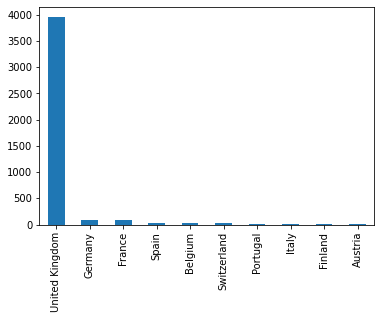

In [18]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')
plt.show()

In [20]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [21]:
temp_df.head(10)

,Country
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480
Australia,1259


In [22]:
names  = temp_df.index

In [25]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [28]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

In [30]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "UnitPrice", size = "UnitPrice", title = "Average UnitPrice by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [31]:
countries = data["Country"].unique()

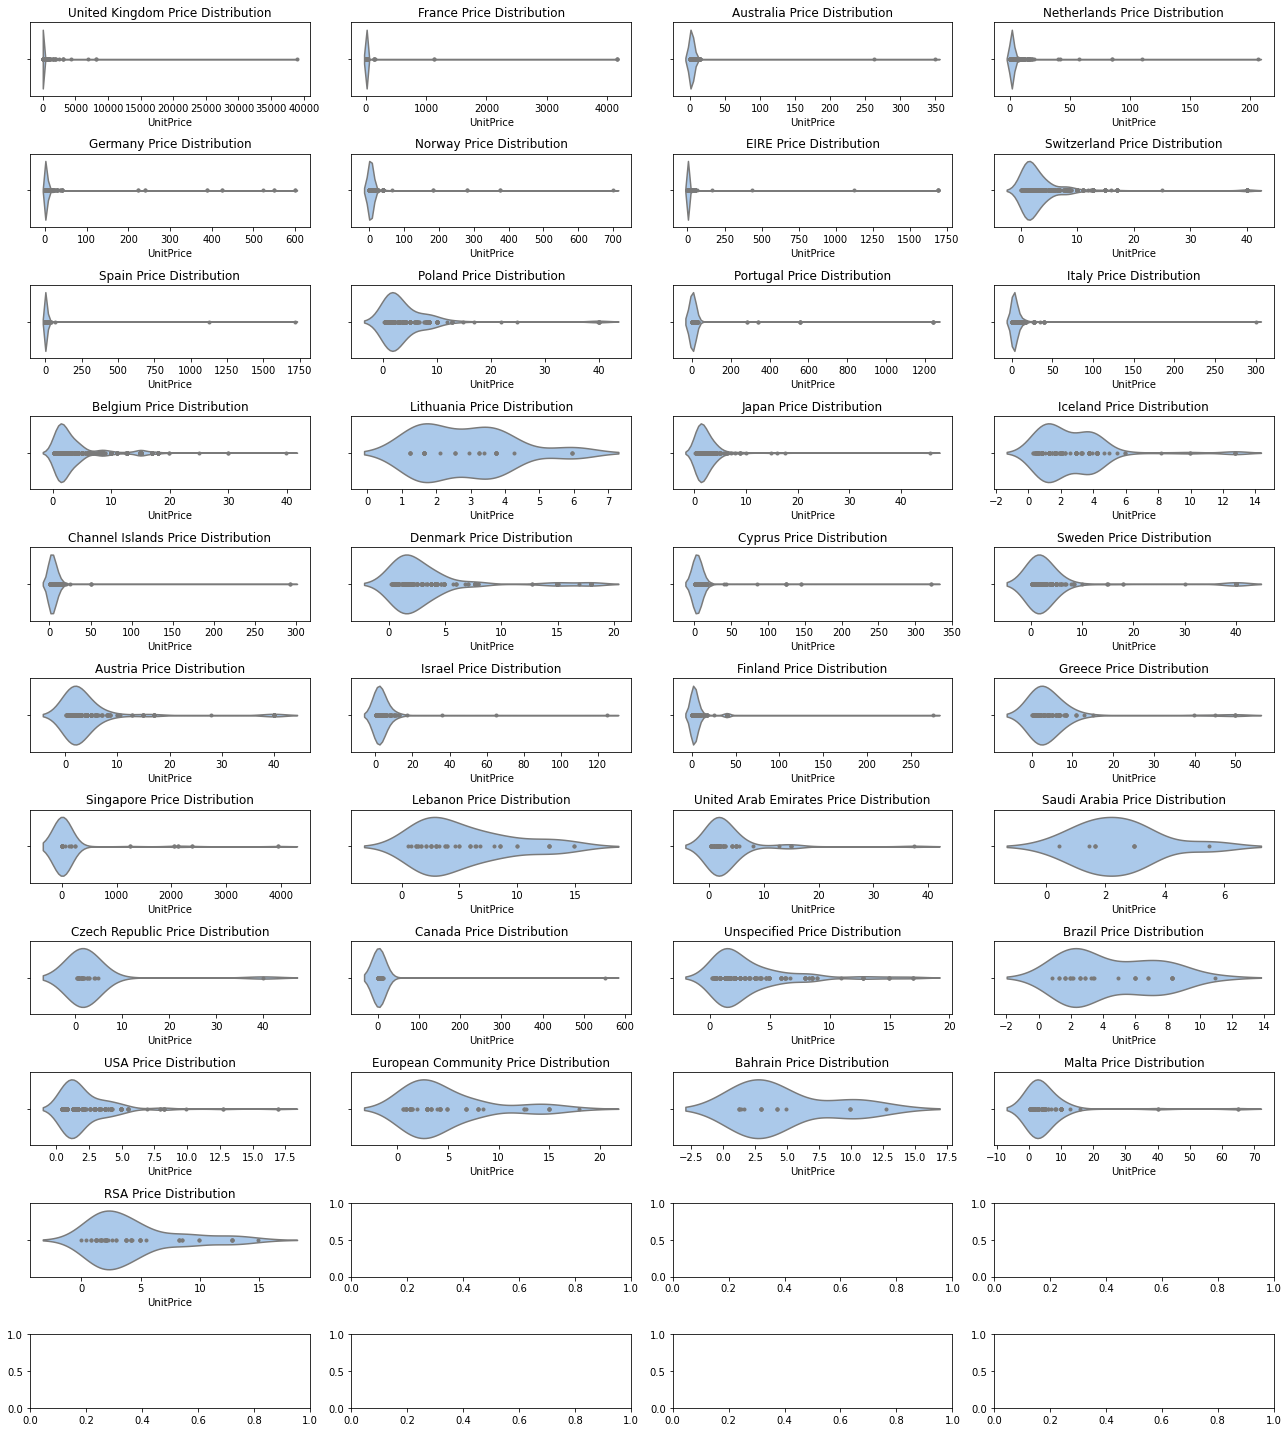

In [32]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "UnitPrice", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [34]:
#Total Number of Unique Invoices 
len(data["InvoiceNo"].unique())

22190

In [36]:
temp_invoice_df = data.groupby("InvoiceNo").sum()

In [37]:
temp_invoice_df.reset_index(inplace = True)

In [38]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,InvoiceNo,Quantity
18503,581483,80995
1909,541431,74215
8112,556917,15049
10612,563076,14730
14371,572035,13392
12419,567423,12572
17360,578841,12540
6437,552883,12266
10843,563614,12196
10344,562439,11848


In [39]:
data.groupby(["InvoiceNo"]).mean().head(15).iloc[:, [1]].sort_values("UnitPrice", ascending = False)

,UnitPrice
InvoiceNo,
536374,10.950000
536369,5.950000
536367,4.853333
536368,4.775000
536365,3.910000
536373,3.319375
536375,3.319375
536376,3.000000
536370,2.764500


I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 536374 & 536369 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [41]:
data[(data["InvoiceNo"] == 536374) | (data["InvoiceNo"] == 536369)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-01-12 08:35:00,5.95,13047.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-01-12 09:09:00,10.95,15100.0,United Kingdom


As we can see above, These 2 invoices with invoice number 536369 and 536374 had only single transaction, that's why the average price was too high.

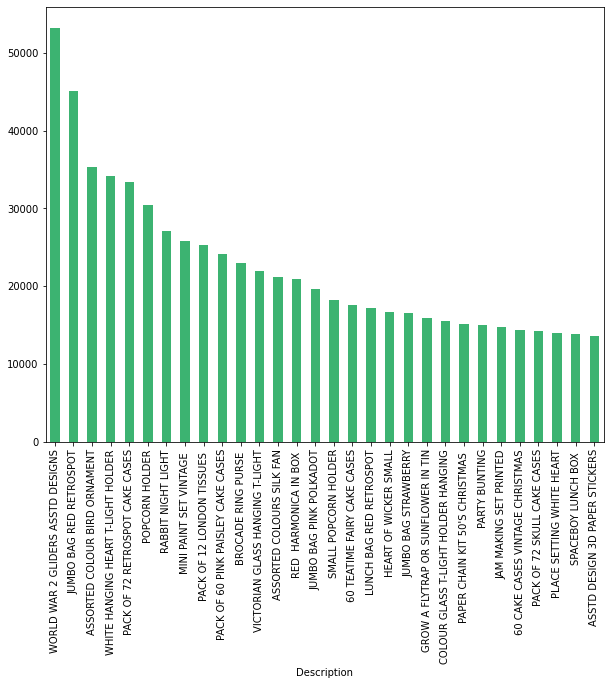

In [42]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

**Top 8 Countries With Most Transactions**

In [49]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [50]:
temp = pd.DataFrame(temp)

In [51]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

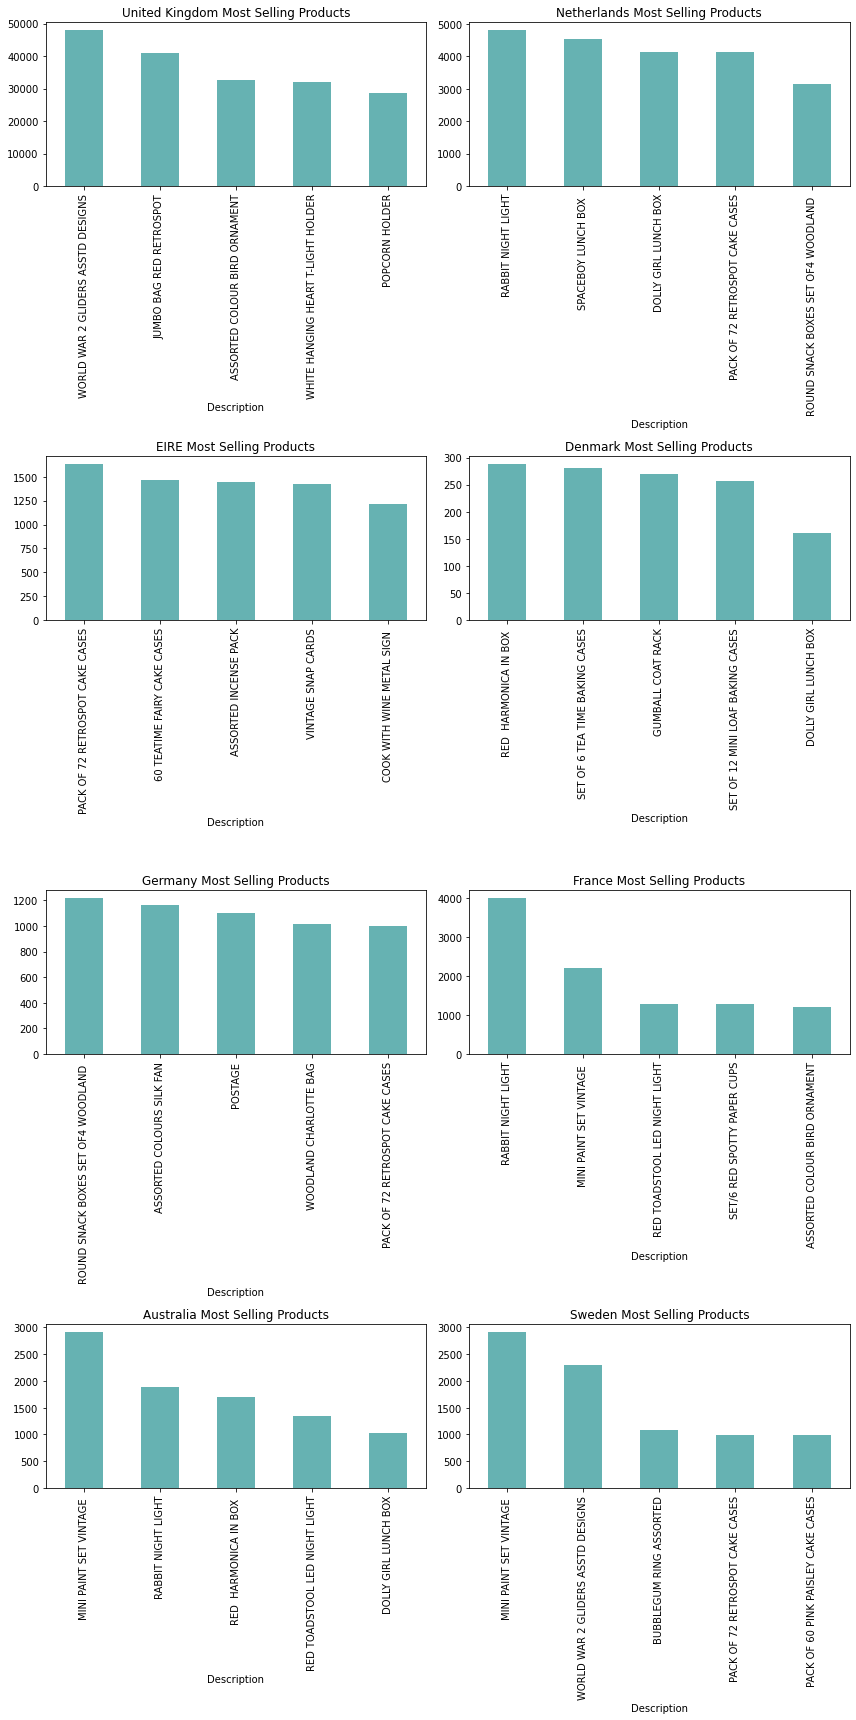

In [52]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

#### Filter required Columns
Here, we can filter the necessary columns for calculating CLTV. We only need here five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.
 - CustomerID will uniquely define our customers.
 - InvoiceDate help us calculate numbers of days customer stayed with your product.
 - InvoiceNo helps us to count the number of time transaction performed(frequency).
 - Quantity is purchased item units in each transaction
 - UnitPrice of each unit purchased by the customer will help us to calculate the total purchased amount.

In the given dataset, we can observe most of the customers are from "United Kingdom". So, we can filter data for United Kingdom customer.

In [ ]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

In [ ]:
uk_data.describe()

Here, we can observe some of the customers have ordered in a negative quantity, which is not possible. So, we need to filter Quantity greater than zero.


In [ ]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

In [56]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Here, we are going to perform the following operations:
- Calculate the number of days between the present date and the date of last purchase from each customer.
- Calculate the number of orders for each customer.
- Calculate sum of purchase price for each customer.

In [76]:
uk_data_group=uk_data.groupby("CustomerID").agg({"InvoiceNo":lambda x: len(x),"Quantity":lambda x: x.sum(),"TotalPurchase":lambda x:x.sum()})
uk_data_group.head()

,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,
12346.0,1,74215,77183.60
12747.0,103,1275,4196.01
12748.0,4596,25748,33719.73
12749.0,199,1471,4090.88
12820.0,59,722,942.34


Renaming the column

In [77]:
# Change the name of columns
uk_data_group.columns=['num_transactions','num_units','spent_money']
uk_data_group.head()

,num_transactions,num_units,spent_money
CustomerID,,,
12346.0,1,74215,77183.60
12747.0,103,1275,4196.01
12748.0,4596,25748,33719.73
12749.0,199,1471,4090.88
12820.0,59,722,942.34


## Calculate CLTV using following formula:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency

In [78]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']
uk_data_group.head()

,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,
12346.0,1,74215,77183.60,77183.600000
12747.0,103,1275,4196.01,40.737961
12748.0,4596,25748,33719.73,7.336756
12749.0,199,1471,4090.88,20.557186
12820.0,59,722,942.34,15.971864


##  Calculate Purchase Frequency

In [80]:
uk_data_group['purchase_frequency']=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]
uk_data_group['purchase_frequency'].head()

CustomerID
12346.0    90.371079
12747.0    90.371079
12748.0    90.371079
12749.0    90.371079
12820.0    90.371079
Name: purchase_frequency, dtype: float64

## Calculate Repeat Rate and Churn Rate

In [81]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]
#Churn Rate
churn_rate=1-repeat_rate
churn_rate

0.018107625605712774

## Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [82]:
# Profit Margin
# We assume 5% profit from the total price and since it is unique for each customer, 
# we add this dataset, profit margin to this dataset.
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05
uk_data_group.head()

,num_transactions,num_units,spent_money,avg_order_value,purchase_frequency,profit_margin
CustomerID,,,,,,
12346.0,1,74215,77183.60,77183.600000,90.371079,3859.1800
12747.0,103,1275,4196.01,40.737961,90.371079,209.8005
12748.0,4596,25748,33719.73,7.336756,90.371079,1685.9865
12749.0,199,1471,4090.88,20.557186,90.371079,204.5440
12820.0,59,722,942.34,15.971864,90.371079,47.1170


## Calcualte Customer Lifetime Value

In [84]:
# Customer Value
uk_data_group['CV']=(uk_data_group['avg_order_value']/uk_data_group['purchase_frequency'])/churn_rate

#Customer Lifetime Value
uk_data_group['CLTV']=uk_data_group['CV']*uk_data_group['profit_margin']
pd.set_option('display.float_format', lambda x: '%.5f' % x)
uk_data_group.sort_values("CLTV",ascending=False).head()

,num_transactions,num_units,spent_money,avg_order_value,purchase_frequency,profit_margin,CLV,cust_lifetime_value,CV,CLTV
CustomerID,,,,,,,,,,
16446.00000,3,80997,168472.50000,56157.50000,90.37108,8423.62500,280269427.28873,2360884554445.05566,34317.59090,289078516.60745
12346.00000,1,74215,77183.60000,77183.60000,90.37108,3859.18000,385205954.11268,1486579113992.56201,47166.54425,182024184.23361
15098.00000,3,121,39916.50000,13305.50000,90.37108,1995.82500,66404752.07746,132532264315.00656,8130.93007,16227913.51601
15749.00000,10,18028,44534.30000,4453.43000,90.37108,2226.71500,22226065.54014,49491113529.21487,2721.47066,6059939.54992
18102.00000,431,64124,259657.30000,602.45313,90.37108,12982.86500,3006707.81898,39035681708.21651,368.15635,4779724.16810


# Prediction Model for CLTV
Let's build the CLTV prediction model. 
Here, we are going to predict CLTV using Linear Regression Model.
Let's first use the data loaded and filtered above.

In [ ]:
uk_data.head()

,CustomerID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0


Extract month and year from InvoiceDate.

In [ ]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
uk_data.head()

,CustomerID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase,month_yr
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4,Dec-2009
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0,Dec-2009
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0,Dec-2009
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8,Dec-2009
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0,Dec-2009


The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.

In [ ]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,CustomerID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,Jul-2010,Jul-2011,Jun-2010,Jun-2011,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12346.0,0.00,0.0,0.00,0.0,113.5,0.00,0.0,0.0,0.0,90.0,77183.60,0.0,0.0,142.31,0.0,27.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,12608.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,415.79,0.00,0.0,0.0
2,12745.0,0.00,0.0,266.93,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,456.92,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,12746.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,254.55,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,12747.0,213.28,0.0,629.68,301.7,1032.0,1064.83,438.5,260.0,0.0,0.0,303.04,0.0,0.0,666.25,376.3,210.89,310.78,267.37,771.31,394.75,312.73,1047.75,675.38,0.0,0.0


Let's sum all the months sales.

In [ ]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,Jul-2010,Jul-2011,Jun-2010,Jun-2011,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
0,12346.0,0.00,0.0,0.00,0.0,113.5,0.00,0.0,0.0,0.0,90.0,77183.60,0.0,0.0,142.31,0.0,27.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,77556.46
1,12608.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,415.79,0.00,0.0,0.0,415.79
2,12745.0,0.00,0.0,266.93,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,456.92,0.00,0.00,0.00,0.00,0.00,0.0,0.0,723.85
3,12746.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,254.55,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,254.55
4,12747.0,213.28,0.0,629.68,301.7,1032.0,1064.83,438.5,260.0,0.0,0.0,303.04,0.0,0.0,666.25,376.3,210.89,310.78,267.37,771.31,394.75,312.73,1047.75,675.38,0.0,0.0,9063.26


### Selecting Feature
Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select latest 6 month as independent variable.

In [ ]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

We need to pass 3 parameters features, target, and test_set size. Additionally, we can use random_state as a seed value to maintain reproducibility, which means whenever we split the data will not affect the results. Also, if random_state is None, then random number generator uses np.random for selecting records randomly. It means if we don't set a seed, it is different each time.

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[566.11787579]
[[ 1.01751333 -0.531795    5.16118077  2.17226292  3.41550287  7.1467061 ]]


### Model Fit 
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.

In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.7042753032688885


This model has a higher R-squared (0.96). This model provides a better fit to the data.
Model Evaluation
For regression problems following evaluation metrics used:
- Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
- Mean Squared Error (MSE) is the mean of the squared errors.
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [ ]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1627.802410305381
MSE 20053274.17899187
RMSE: 4478.088228138417


RMSE is more popular than MSE and MAE because RMSE is interpretable with y because of the same units.

# Pros and Cons of CLTV
- CLTV helps us to design an effective business plan and also provide a chance to scale our business.
- CLTV draw meaningful customer segments these segment can help us to identify needs of the different-different segment. 
- CLTV can figure out most profitable customers, but how we are going to make a profit from them, it depends on our strategy. 
Generally, CLTV models are confused and misused. Obsession with CLTV may create blunders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers.

# CLTV Model Definition
For the CLTV models, the following nomenclature is used:
- Frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.
- T represents the age of the customer in whatever time units chosen (daily, in our dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
- Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

We have some cleaning to do, then create a new dataframe that contains CustomerID, InvoiceDate (remove the time) and add a new column — sales:

In [ ]:
import datetime as dt
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date
data = data[pd.notnull(data['CustomerID'])]
data = data[(data['Quantity']>0)]
data['Sales'] = data['Quantity'] * data['Price']
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
data = data[cols_of_interest]
print(data.head())
print(data['CustomerID'].nunique())

   CustomerID InvoiceDate  Sales
0     13085.0  2009-12-01   83.4
1     13085.0  2009-12-01   81.0
2     13085.0  2009-12-01   81.0
3     13085.0  2009-12-01  100.8
4     13085.0  2009-12-01   30.0
5881


In [ ]:
pip install lifetimes

     |████████████████████████████████| 584 kB 10.8 MB/s 


In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *

df = summary_data_from_transaction_data(data, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-9')
df.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,7.0,400.0,725.0,11066.637143
12347.0,7.0,402.0,404.0,717.398571
12348.0,4.0,363.0,438.0,449.310000
12349.0,3.0,571.0,589.0,1120.056667
12350.0,0.0,0.0,310.0,0.000000


There are 4339 customers under our analysis.
CustomerID 12346 made 1 purchase only (no repeat), so the frequency and recency are 0, and the age is 325 days (e.g. the duration between the first purchase and the end of the period in the analysis).

count    5881.000000
mean        4.630335
std        10.001176
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       254.000000
Name: frequency, dtype: float64
0.002100245773441573


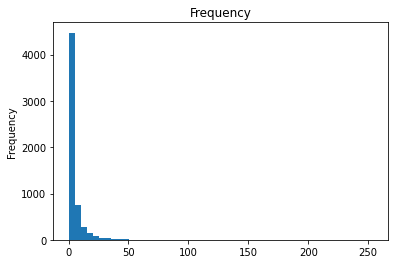

In [ ]:
df['frequency'].plot(kind='hist', bins=50)
plt.title('Frequency')
print(df['frequency'].describe())
print(sum(df['frequency'] == 0)/float(len(data)))

count    5881.000000
mean      273.254208
std       258.971689
min         0.000000
25%         0.000000
50%       220.000000
75%       512.000000
max       738.000000
Name: recency, dtype: float64
0.002100245773441573


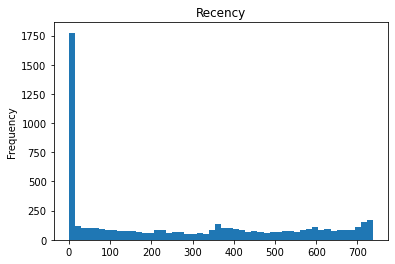

In [ ]:
df['recency'].plot(kind='hist', bins=50)
plt.title('Recency')
print(df['recency'].describe())
print(sum(df['recency'] == 0)/float(len(data)))

Among all customers in our data, more than 35% of them only made purchase once (no repeat).
## Frequency/Recency Analysis Using the BG/NBD Model

In [ ]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df['frequency'], df['recency'], df['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5881 subjects, a: 0.11, alpha: 63.18, b: 2.42, r: 0.66>


In [ ]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.662732,0.015825,0.631715,0.693749
alpha,63.184460,1.934702,59.392443,66.976476
a,0.108660,0.015446,0.078387,0.138934
b,2.418366,0.524988,1.389391,3.447342


<lifetimes.BetaGeoFitter: fitted with 5881 subjects, a: 0.11, alpha: 63.18, b: 2.42, r: 0.66>


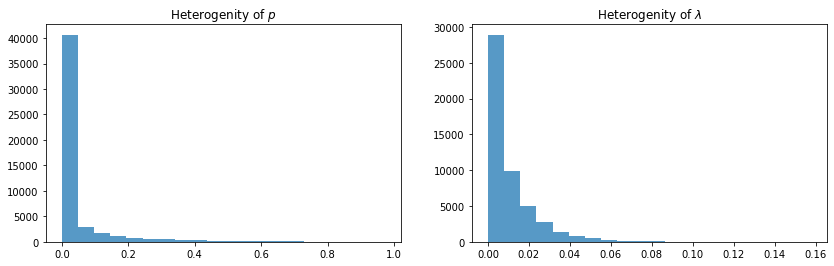

In [ ]:
from scipy.stats import gamma, beta
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df['frequency'], df['recency'], df['T'], )
print (bgf)
#  
# Plot
gbd = beta.rvs(bgf.params_['a'], bgf.params_['b'], size = 50000)
ggd = gamma.rvs(bgf.params_['r'], scale=1./bgf.params_['alpha'], size = 50000)
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Heterogenity of $p$')
temp = plt.hist(gbd, 20,  alpha=0.75)
plt.subplot(122) 
plt.title('Heterogenity of $\lambda$')
temp = plt.hist(ggd, 20,  alpha=0.75)

### Visualizing our frequency/recency matrix
Let's do some hypothetical analysis-
- Customer who purchased every day for four weeks straight, and no transactions in months; chances of that customer being alive is less. 
- On the other hand, a customer who historically made purchase once a quarter, and again last quarter, is likely still alive. We can visualize this relationship using the frequency/recency matrix, which computes the expected number of transactions an artificial customer is to make in the next time period, given the recency (age at last purchase) and frequency (the number of repeat transactions  made).

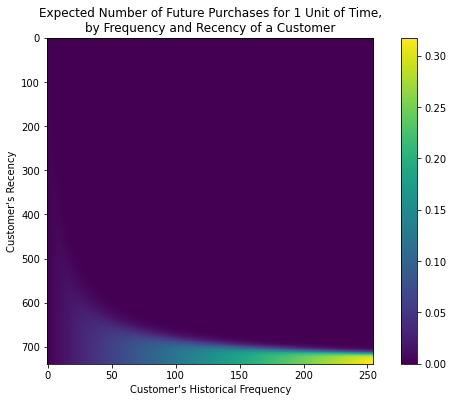

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

We can see that, if a customer has made 120 purchases, and their latest purchase was when they were approximately 350 days old (i.e. Recency: the duration between their first transaction and their latest transaction is 350 days), then they are our best customer (bottom-right).

Customers who have purchased a lot and purchased recently will likely be the best customers in the future. We will never have enough of them.

Customers who have purchased a lot but not recently (top-right corner), have probably gone.
There are also another type of customers that around (40, 100) that represents the customer who buys infrequently, and we have not seen them recently, so they might buy again. However, we are not sure if they have gone or just between purchases.

Another interesting matrix to look at is the probability of still being alive:


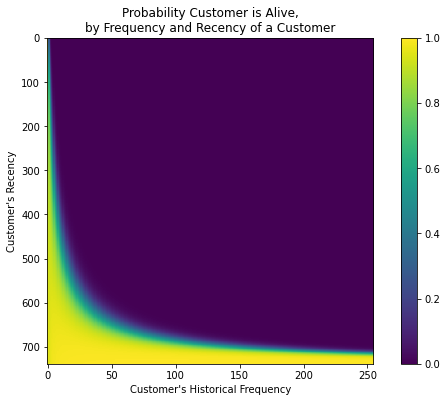

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

- Customers who have purchased recently are almost surely “alive”.
- Customers who have purchased a lot but not recently, are likely to have dropped out. And the more they bought in the past, the more likely they have dropped out. They are represented in the upper-right.

### Ranking customers from best to worst
Let’s return to our customers and rank them from “highest expected purchases in the next period” to lowest. Models expose a method that will predict a customer’s expected purchases in the next period using their history.


In [ ]:
t = 10
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df['frequency'], df['recency'], df['T'])
df.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
13798.0,98.0,730.0,731.0,768.906837,1.239942
12971.0,98.0,721.0,724.0,162.360612,1.250517
14156.0,120.0,729.0,738.0,2607.329750,1.499799
14527.0,120.0,735.0,737.0,223.904250,1.505103
13089.0,131.0,735.0,737.0,888.318779,1.642426
14606.0,180.0,735.0,736.0,170.255889,2.257371
17841.0,192.0,736.0,737.0,366.423490,2.404390
15311.0,195.0,738.0,738.0,594.605846,2.439178
12748.0,202.0,735.0,735.0,279.101436,2.535979


Listed above are our top 10 customers that the model expects them to make purchases in the next day. We can see that the customer who has made 131 purchases, and bought very recently from us, is probably going to buy again in the next period.


The predicted_purchases column represents their expected number of purchases while the other three columns represent their current RF metrics. The BG/NBD model believes these individuals will be making more purchases within the near future as they are our current best customers.
#### Assessing model fit
So far, we can predict and we can visualize our customers’ behavior. Now let us assess the model’s correctness. The ﬁrst is to compare your data versus artiﬁcial data simulated with our ﬁtted model’s parameters.


CPU times: user 1.92 s, sys: 92.3 ms, total: 2.01 s
Wall time: 1.9 s


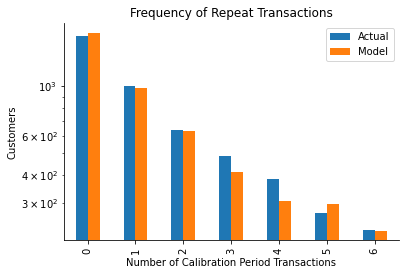

In [ ]:
%%time 

from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

We can see that our actual data and our simulated data line up well. 
So, we can continue on with our analysis. We now partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (just like cross-validation in machine learning practice).

### Example using transactional datasets
Most often, the dataset you have at hand will be at the transaction level. Lifetimes has some utility functions to transform that transactional data (one row per purchase) into summary data (a frequency, recency and age dataset).

In [ ]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

transaction_data = load_transaction_data()
print(transaction_data.head())

                  date  id
0  2014-03-08 00:00:00   0
1  2014-05-21 00:00:00   1
2  2014-03-14 00:00:00   2
3  2014-04-09 00:00:00   2
4  2014-05-21 00:00:00   2


In [ ]:
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2014-12-31')
print(summary.head())

    frequency  recency      T
id                           
0         0.0      0.0  298.0
1         0.0      0.0  224.0
2         6.0    142.0  292.0
3         0.0      0.0  147.0
4         2.0      9.0  183.0


In [ ]:
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 5000 subjects, a: 1.85, alpha: 1.86, b: 3.18, r: 0.16>

### More model fitting
With transactional data, we can partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (think cross-validation in standard machine learning literature).

In [ ]:
from lifetimes.utils import calibration_and_holdout_data
pd.get_option("display.max_columns")
summary_cal_holdout = calibration_and_holdout_data(data, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )
print(summary_cal_holdout.head())


            frequency_cal  recency_cal  ...  frequency_holdout  duration_holdout
CustomerID                              ...                                     
12346.0               7.0        400.0  ...                0.0             184.0
12347.0               3.0        158.0  ...                4.0             184.0
12348.0               3.0        190.0  ...                1.0             184.0
12349.0               2.0        182.0  ...                1.0             184.0
12350.0               0.0          0.0  ...                0.0             184.0

[5 rows x 5 columns]


With this dataset, we can perform ﬁtting on the _cal columns, and test on the _holdout columns:


CPU times: user 311 ms, sys: 66.6 ms, total: 377 ms
Wall time: 306 ms


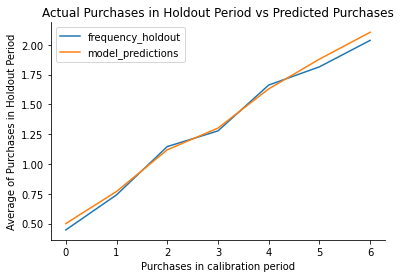

In [ ]:
%%time 

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
sns.despine();

In this plot, we separate the data into both a in-sample (calibration) and validation (holdout) period. The sample period consists the beginning to 2011–06–08; the validation period spans from 2011–06–09 to 2011–12–09. The plot groups all customers in the calibration period by their number of repeat purchases (x-axis) and then averages over their repeat purchases in the holdout period (y-axis). The orange and blue line presents the model prediction and actual result of the y-axis respectively. As we can see, our model is able to predict the customer base’s behaviour out of the sample, the model under-estimates at 4 purchases and after 5 purchases.
### Customer transactions predictions
Based on customer history, we can now predict what an individual’s future purchases might look like:

In [ ]:
t = 10 #predict purchases in 10 periods 
individual = df.loc[12347]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_, to_time` 
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

0.16048796214422956

Our model predicts that customer 12347’s future transaction is 0.157 in 10 days.
#### Customer probability histories

Given a customer transaction history, we can calculate their historical probability of being alive, according to our trained model. For example, we want to look at our best customer’s transactions history and see the probability of being alive:

In [ ]:
t = 1
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df['frequency'], df['recency'], df['T'])
best_projected_cust = df.sort_values('predicted_purchases').tail(6)
df.sort_values(by='predicted_purchases').tail(6)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
13089.0,131.0,735.0,737.0,888.318779,0.163809
14606.0,180.0,735.0,736.0,170.255889,0.225172
17841.0,192.0,736.0,737.0,366.423490,0.239841
15311.0,195.0,738.0,738.0,594.605846,0.243328
12748.0,202.0,735.0,735.0,279.101436,0.252984
14911.0,254.0,737.0,738.0,1162.358268,0.316682


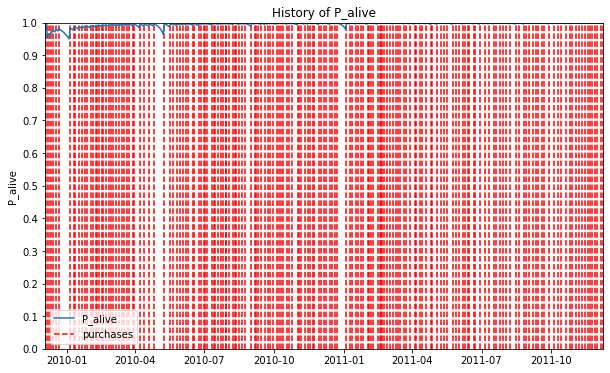

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
id = 14606
days_since_birth = 365
sp_trans = data.loc[data['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')
plt.show()

As per this plot, our best customer is not alive. On the other hand, this customer had only purchased once and has dropped off for a long time with a 100% chance that he is dead.
## Estimating customer lifetime value using gamma-gamma model of monetary value
So far, we didn’t take into account the economic value of each transaction and we focused mainly on transactions’ occurrences. To estimate this we can use the Gamma-Gamma submodel. But ﬁrst we need to create summary data from transactional data also containing economic values for each transaction (i.e. proﬁts or revenues). 

As we are aware by now that, to create a summary dataset which contains information about every customer. We can use the summary_data_from_transaction_data function to generate a summary data frame.

The result contains four columns:

- recency — the time between the first and the last transaction

- frequency — the number of purchases beyond the initial one

- T — the time between the first purchase and the end of the calibration period

- monetary value — the arithmetic mean of customer’s transactions in the calibration period


If we have some customers who did not buy anything in the calibration period and their monetary value in the summary dataset is zero, we must remove them. After that we can build the model. We are only estimating the customers who had at least one repeat purchase with us. Therefore, we are estimating for 2,790 customers.

In [ ]:
summary = df[df['frequency']>0]
print(summary.head())
print()
print('\nCustomers with atleast 1 repeat purchase\n', len(summary))

            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12346.0           7.0    400.0  725.0    11066.637143             0.004934
12347.0           7.0    402.0  404.0      717.398571             0.016068
12348.0           4.0    363.0  438.0      449.310000             0.008825
12349.0           3.0    571.0  589.0     1120.056667             0.005439
12352.0           8.0    356.0  392.0      338.261250             0.018396


Customers with atleast 1 repeat purchase
 4189


In [ ]:
summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.023223
frequency,0.023223,1.000000


### The Gamma-Gamma model and the independence assumption


Gamma-Gamma model is based on the assumption that the number of transactions does not depend on their monetary value. The frequency and monetary value are not correlated if the output is close to zero. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [ ]:
summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.023223
frequency,0.023223,1.000000


It seems that we can use the summary to estimate CLTV. We can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.


In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(summary['frequency'],
        summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 2.13, q: 3.53, v: 486.53>


After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 

In [ ]:
print(ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).head(10))

CustomerID
12346.0    9520.529482
12347.0     672.740683
12348.0     440.212758
12349.0     918.531323
12352.0     347.481829
12353.0     263.054511
12355.0     432.350492
12356.0     961.519741
12357.0    3059.669630
12358.0     567.432251
dtype: float64


In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary['frequency'],
        summary['monetary_value']
    ).mean(),
    summary[summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 436.59486885516947, Average profit: 447.6859962268581


While for computing the total CLV using the DCF method (https://en.wikipedia.org/wiki/Discounted_cash_ﬂow) adjusting for cost of capital:


In [ ]:
# refit the BG model to the summary_with_money_value dataset 
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(ggf.customer_lifetime_value( 
    bgf, #the model to use to predict the number of future transactions 
    summary['frequency'], 
    summary['recency'], 
    summary['T'], 
    summary['monetary_value'], time=12, # months 
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually 
).head(10)) 

CustomerID
12346.0    15951.934552
12347.0     3630.291747
12348.0     1385.123766
12349.0     1898.361751
12352.0     2121.373242
12353.0      313.751300
12355.0      426.178131
12356.0     3777.996438
12357.0     4570.759846
12358.0     1208.619817
Name: clv, dtype: float64


## Saving and loading model
When we have  lots of data and training takes a lot of time option with saving and loading model could be useful. First we need to ﬁt the model, then save it and load.

### Fit model



In [ ]:
from lifetimes import BetaGeoFitter 
from lifetimes.datasets import load_cdnow_summary
data = load_cdnow_summary(index_col=[0]) 
bgf = BetaGeoFitter() 
bgf.fit(summary['frequency'], summary['recency'], summary['T']) 
bgf 

<lifetimes.BetaGeoFitter: fitted with 4189 subjects, a: 0.10, alpha: 104.61, b: 1.12, r: 1.54>

### Saving model
Model will be saved with dill to pickle object. Optional parameters save_data and save_generate_data_method are present to reduce ﬁnal pickle object size for big dataframes. Optional parameters: 
- save_data is used for saving data from model or not (default: True). 
- save_generate_data_method is used for saving generate_new_data method from model or not (default: True)


In [ ]:
bgf.save_model('bgf.pkl')


### Loading model
Before loading we should initialize the model ﬁrst and then use method load_model


In [ ]:
bgf_loaded = BetaGeoFitter() 
bgf_loaded.load_model('bgf.pkl') 
bgf_loaded 

<lifetimes.BetaGeoFitter: fitted with 4189 subjects, a: 0.10, alpha: 104.61, b: 1.12, r: 1.54>

In [ ]:
ggf.save_model('ggf.pkl')

In [ ]:
ggf_loaded = GammaGammaFitter() 
ggf_loaded.load_model('ggf.pkl') 
ggf_loaded 